In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from IPython.display import display, Image
from matplotlib.pyplot import imshow
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab
import matplotlib.pyplot as plt

import os
print(os.listdir("C:/Partition/Varshini/IDS 576/Project/Second method/train/urban"))

INPUT_IMAGE_SRC = 'C:/Partition/Varshini/IDS 576/Project/Second method/train/urban/urban_3.jpeg'
# INPUT_IMAGE_SRC = 'C:/Partition/Varshini/IDS 576/Project/Data/testdata/Train/1PFDZe.jpg'


['urban_1.jpeg', 'urban_11.jpeg', 'urban_12.jpeg', 'urban_13.jpeg', 'urban_14.jpeg', 'urban_16.jpeg', 'urban_17.jpeg', 'urban_18.jpeg', 'urban_19.jpeg', 'urban_2.jpeg', 'urban_21.jpeg', 'urban_22.jpeg', 'urban_23.jpeg', 'urban_24.jpeg', 'urban_26.jpeg', 'urban_27.jpeg', 'urban_28.jpeg', 'urban_29.jpg', 'urban_3.jpeg', 'urban_31.jpeg', 'urban_32.jpeg', 'urban_33.jpeg', 'urban_34.jpeg', 'urban_36.jpeg', 'urban_37.jpg', 'urban_38.jpg', 'urban_39.jpeg', 'urban_4.jpeg', 'urban_41.jpeg', 'urban_42.jpeg', 'urban_43.jpeg', 'urban_44.jpg', 'urban_6.jpeg', 'urban_7.jpeg', 'urban_8.jpeg', 'urban_9.jpeg']


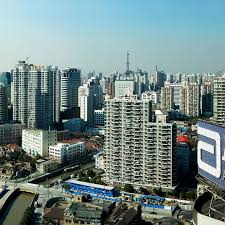

In [105]:
display(Image(INPUT_IMAGE_SRC, width=225))

In [106]:
image = img_to_array(load_img(INPUT_IMAGE_SRC, target_size=(200,200))) / 255
lab_image = rgb2lab(image)
lab_image.shape

(200, 200, 3)

In [107]:
lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]

In [108]:
# The input will be the black and white layer
X = lab_image_norm[:,:,0]
# The outputs will be the ab channels
Y = lab_image_norm[:,:,1:]


In [109]:
print(X.shape)
print(Y.shape)

(200, 200)
(200, 200, 2)


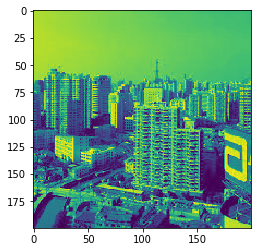

In [110]:
imshow(X)
plt.show()

In [111]:
# The Conv2D layer we will use later expects the inputs and training outputs to be of the following format:
# (samples, rows, cols, channels), so we need to do some reshaping
# https://keras.io/layers/convolutional/
X = X.reshape(1, X.shape[0], X.shape[1], 1)
Y = Y.reshape(1, Y.shape[0], Y.shape[1], 2)

In [112]:
print(X.shape)
print(Y.shape)

(1, 200, 200, 1)
(1, 200, 200, 2)


In [113]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3,3), activation='tanh', padding='same'))



In [114]:
# Finish model
model.compile(optimizer='rmsprop', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3028
Epoch 2/1000
1/1 [==============================] - 0s 203ms/step - loss: 0.2260
Epoch 3/1000
1/1 [==============================] - 0s 159ms/step - loss: 0.1604
Epoch 4/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0473
Epoch 5/1000
1/1 [==============================] - 0s 145ms/step - loss: 0.0829
Epoch 6/1000
1/1 [==============================] - 0s 146ms/step - loss: 0.0545
Epoch 7/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0274
Epoch 8/1000
1/1 [==============================] - 0s 118ms/step - loss: 0.0257
Epoch 9/1000
1/1 [==============================] - 0s 134ms/step - loss: 0.0226
Epoch 10/1000
1/1 [==============================] - 0s 125ms/step - loss: 0.0217
Epoch 11/1000
1/1 [==============================] - 0s 127ms/step - loss: 0.0254
Epoch 12/1000
1/1 [==============================] - 0s 126ms/step - loss: 0.0406
Epoch 13/1000
1/1 [=========

1/1 [==============================] - 0s 141ms/step - loss: 0.0043
Epoch 102/1000
1/1 [==============================] - 0s 160ms/step - loss: 0.0059
Epoch 103/1000
1/1 [==============================] - 0s 187ms/step - loss: 0.0043
Epoch 104/1000
1/1 [==============================] - 0s 159ms/step - loss: 0.0060
Epoch 105/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.0041
Epoch 106/1000
1/1 [==============================] - 0s 183ms/step - loss: 0.0055
Epoch 107/1000
1/1 [==============================] - 0s 154ms/step - loss: 0.0039
Epoch 108/1000
1/1 [==============================] - 0s 152ms/step - loss: 0.0053
Epoch 109/1000
1/1 [==============================] - 0s 187ms/step - loss: 0.0040
Epoch 110/1000
1/1 [==============================] - 0s 150ms/step - loss: 0.0055
Epoch 111/1000
1/1 [==============================] - 0s 183ms/step - loss: 0.0038
Epoch 112/1000
1/1 [==============================] - 0s 193ms/step - loss: 0.0051
Epoch 113/1000
1/1 

Epoch 200/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0026
Epoch 201/1000
1/1 [==============================] - 0s 150ms/step - loss: 0.0020
Epoch 202/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.0025
Epoch 203/1000
1/1 [==============================] - 0s 127ms/step - loss: 0.0020
Epoch 204/1000
1/1 [==============================] - 0s 151ms/step - loss: 0.0025
Epoch 205/1000
1/1 [==============================] - 0s 177ms/step - loss: 0.0020
Epoch 206/1000
1/1 [==============================] - 0s 143ms/step - loss: 0.0024
Epoch 207/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0020
Epoch 208/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0025
Epoch 209/1000
1/1 [==============================] - 0s 124ms/step - loss: 0.0020
Epoch 210/1000
1/1 [==============================] - 0s 152ms/step - loss: 0.0025
Epoch 211/1000
1/1 [==============================] - 0s 162ms/step - loss: 0.0019
Epoc

Epoch 299/1000
1/1 [==============================] - 0s 148ms/step - loss: 0.0017
Epoch 300/1000
1/1 [==============================] - 0s 152ms/step - loss: 0.0018
Epoch 301/1000
1/1 [==============================] - 0s 187ms/step - loss: 0.0021
Epoch 302/1000
1/1 [==============================] - 0s 182ms/step - loss: 0.0028
Epoch 303/1000
1/1 [==============================] - 0s 193ms/step - loss: 0.0014
Epoch 304/1000
1/1 [==============================] - 0s 199ms/step - loss: 0.0012
Epoch 305/1000
1/1 [==============================] - 0s 159ms/step - loss: 8.3360e-04
Epoch 306/1000
1/1 [==============================] - 0s 151ms/step - loss: 7.7026e-04
Epoch 307/1000
1/1 [==============================] - 0s 186ms/step - loss: 6.9336e-04
Epoch 308/1000
1/1 [==============================] - 0s 161ms/step - loss: 7.1834e-04
Epoch 309/1000
1/1 [==============================] - 0s 186ms/step - loss: 7.2606e-04
Epoch 310/1000
1/1 [==============================] - 0s 145ms/step

Epoch 396/1000
1/1 [==============================] - 0s 158ms/step - loss: 0.0011
Epoch 397/1000
1/1 [==============================] - 0s 174ms/step - loss: 8.6295e-04
Epoch 398/1000
1/1 [==============================] - 0s 178ms/step - loss: 8.7922e-04
Epoch 399/1000
1/1 [==============================] - 0s 181ms/step - loss: 7.6661e-04
Epoch 400/1000
1/1 [==============================] - 0s 189ms/step - loss: 8.3036e-04
Epoch 401/1000
1/1 [==============================] - 0s 199ms/step - loss: 7.5115e-04
Epoch 402/1000
1/1 [==============================] - 0s 188ms/step - loss: 8.4019e-04
Epoch 403/1000
1/1 [==============================] - 0s 182ms/step - loss: 8.6127e-04
Epoch 404/1000
1/1 [==============================] - 0s 182ms/step - loss: 0.0010
Epoch 405/1000
1/1 [==============================] - 0s 183ms/step - loss: 0.0011
Epoch 406/1000
1/1 [==============================] - 0s 159ms/step - loss: 0.0013
Epoch 407/1000
1/1 [==============================] - 0s 17

Epoch 491/1000
1/1 [==============================] - 0s 196ms/step - loss: 7.5449e-04
Epoch 492/1000
1/1 [==============================] - 0s 186ms/step - loss: 8.7159e-04
Epoch 493/1000
1/1 [==============================] - 0s 185ms/step - loss: 7.8347e-04
Epoch 494/1000
1/1 [==============================] - 0s 192ms/step - loss: 7.9636e-04
Epoch 495/1000
1/1 [==============================] - 0s 156ms/step - loss: 7.3153e-04
Epoch 496/1000
1/1 [==============================] - 0s 189ms/step - loss: 8.6382e-04
Epoch 497/1000
1/1 [==============================] - 0s 161ms/step - loss: 7.7393e-04
Epoch 498/1000
1/1 [==============================] - 0s 184ms/step - loss: 8.2390e-04
Epoch 499/1000
1/1 [==============================] - 0s 194ms/step - loss: 6.4873e-04
Epoch 500/1000
1/1 [==============================] - 0s 189ms/step - loss: 6.6551e-04
Epoch 501/1000
1/1 [==============================] - 0s 191ms/step - loss: 6.3518e-04
Epoch 502/1000
1/1 [=======================

Epoch 586/1000
1/1 [==============================] - 0s 151ms/step - loss: 0.0010
Epoch 587/1000
1/1 [==============================] - 0s 198ms/step - loss: 7.2783e-04
Epoch 588/1000
1/1 [==============================] - 0s 213ms/step - loss: 6.7766e-04
Epoch 589/1000
1/1 [==============================] - 0s 187ms/step - loss: 4.6536e-04
Epoch 590/1000
1/1 [==============================] - 0s 183ms/step - loss: 4.3526e-04
Epoch 591/1000
1/1 [==============================] - 0s 197ms/step - loss: 4.0201e-04
Epoch 592/1000
1/1 [==============================] - 0s 176ms/step - loss: 4.3672e-04
Epoch 593/1000
1/1 [==============================] - 0s 167ms/step - loss: 4.4301e-04
Epoch 594/1000
1/1 [==============================] - 0s 150ms/step - loss: 4.7485e-04
Epoch 595/1000
1/1 [==============================] - 0s 179ms/step - loss: 4.6697e-04
Epoch 596/1000
1/1 [==============================] - 0s 157ms/step - loss: 5.1356e-04
Epoch 597/1000
1/1 [===========================

Epoch 681/1000
1/1 [==============================] - 0s 156ms/step - loss: 4.1832e-04
Epoch 682/1000
1/1 [==============================] - 0s 162ms/step - loss: 4.3625e-04
Epoch 683/1000
1/1 [==============================] - 0s 181ms/step - loss: 4.2573e-04
Epoch 684/1000
1/1 [==============================] - 0s 158ms/step - loss: 4.8783e-04
Epoch 685/1000
1/1 [==============================] - 0s 165ms/step - loss: 4.7298e-04
Epoch 686/1000
1/1 [==============================] - 0s 149ms/step - loss: 5.4598e-04
Epoch 687/1000
1/1 [==============================] - 0s 183ms/step - loss: 4.9145e-04
Epoch 688/1000
1/1 [==============================] - 0s 160ms/step - loss: 5.2342e-04
Epoch 689/1000
1/1 [==============================] - 0s 167ms/step - loss: 5.1417e-04
Epoch 690/1000
1/1 [==============================] - 0s 149ms/step - loss: 5.7096e-04
Epoch 691/1000
1/1 [==============================] - 0s 167ms/step - loss: 5.8477e-04
Epoch 692/1000
1/1 [=======================

1/1 [==============================] - 0s 164ms/step - loss: 4.1780e-04
Epoch 776/1000
1/1 [==============================] - 0s 154ms/step - loss: 4.3835e-04
Epoch 777/1000
1/1 [==============================] - 0s 188ms/step - loss: 3.9281e-04
Epoch 778/1000
1/1 [==============================] - 0s 160ms/step - loss: 4.2534e-04
Epoch 779/1000
1/1 [==============================] - 0s 196ms/step - loss: 4.1295e-04
Epoch 780/1000
1/1 [==============================] - 0s 163ms/step - loss: 4.1626e-04
Epoch 781/1000
1/1 [==============================] - 0s 144ms/step - loss: 3.9506e-04
Epoch 782/1000
1/1 [==============================] - 0s 148ms/step - loss: 4.3917e-04
Epoch 783/1000
1/1 [==============================] - 0s 161ms/step - loss: 4.2761e-04
Epoch 784/1000
1/1 [==============================] - 0s 148ms/step - loss: 5.1037e-04
Epoch 785/1000
1/1 [==============================] - 0s 144ms/step - loss: 5.3923e-04
Epoch 786/1000
1/1 [==============================] - 0s 1

Epoch 870/1000
1/1 [==============================] - 0s 179ms/step - loss: 3.1631e-04
Epoch 871/1000
1/1 [==============================] - 0s 170ms/step - loss: 2.7299e-04
Epoch 872/1000
1/1 [==============================] - 0s 174ms/step - loss: 2.6834e-04
Epoch 873/1000
1/1 [==============================] - 0s 146ms/step - loss: 2.6134e-04
Epoch 874/1000
1/1 [==============================] - 0s 185ms/step - loss: 2.8407e-04
Epoch 875/1000
1/1 [==============================] - 0s 182ms/step - loss: 3.0995e-04
Epoch 876/1000
1/1 [==============================] - 0s 174ms/step - loss: 3.8585e-04
Epoch 877/1000
1/1 [==============================] - 0s 158ms/step - loss: 4.5172e-04
Epoch 878/1000
1/1 [==============================] - 0s 167ms/step - loss: 5.3652e-04
Epoch 879/1000
1/1 [==============================] - 0s 153ms/step - loss: 5.2344e-04
Epoch 880/1000
1/1 [==============================] - 0s 154ms/step - loss: 5.3959e-04
Epoch 881/1000
1/1 [=======================

1/1 [==============================] - 0s 165ms/step - loss: 4.7380e-04
Epoch 965/1000
1/1 [==============================] - 0s 162ms/step - loss: 4.7381e-04
Epoch 966/1000
1/1 [==============================] - 0s 173ms/step - loss: 4.7181e-04
Epoch 967/1000
1/1 [==============================] - 0s 176ms/step - loss: 3.8799e-04
Epoch 968/1000
1/1 [==============================] - 0s 185ms/step - loss: 3.6725e-04
Epoch 969/1000
1/1 [==============================] - 0s 168ms/step - loss: 2.9678e-04
Epoch 970/1000
1/1 [==============================] - 0s 195ms/step - loss: 2.9952e-04
Epoch 971/1000
1/1 [==============================] - 0s 191ms/step - loss: 2.9084e-04
Epoch 972/1000
1/1 [==============================] - 0s 192ms/step - loss: 3.1480e-04
Epoch 973/1000
1/1 [==============================] - 0s 179ms/step - loss: 3.2273e-04
Epoch 974/1000
1/1 [==============================] - 0s 166ms/step - loss: 3.5542e-04
Epoch 975/1000
1/1 [==============================] - 0s 1

In [115]:
model.evaluate(X, Y, batch_size=1)

1/1 [==============================] - 0s 179ms/step


0.00023505020362790674

In [100]:
def image_L_gen(Test_IMAGE_SRC):
    image = img_to_array(load_img(Test_IMAGE_SRC, target_size=(200,200))) / 255
    lab_image = rgb2lab(image)
    lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]
    X = lab_image_norm[:,:,0]
    X = X.reshape(1, X.shape[0], X.shape[1], 1)
    return X

In [101]:
# Test_IMAGE_SRC = 'C:/Partition/Varshini/IDS 576/Project/Second method/train/urban/urban_31.jpeg'

Test_IMAGE_SRC = 'C:\Partition\Varshini\IDS 576\Project\Second method\train\urban/0fAtAB.jpg'


X = image_L_gen(Test_IMAGE_SRC)
# X.shape

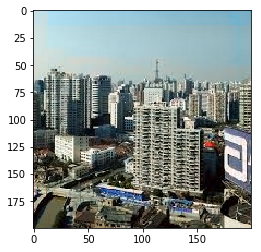

In [116]:
output = model.predict(X)
cur = np.zeros((200, 200, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]


#imshow(rgb_image.astype('float32'))

#cur = (cur * [100, 255, 255]) - [0 ,128, 128]
#output

#rgb_image *= [100, 255, 255]
cur = (cur * [100, 255, 255]) - [0, 128, 128]
rgb_image = lab2rgb(cur)
imshow(rgb_image)
plt.show()

In [103]:
rgb_image.shape

(200, 200, 3)